<a href="https://colab.research.google.com/github/Page0526/diffusion_model/blob/colab/Diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lightning hydra

In [ ]:
from google.colab import drive
import os
# MyDrive/VSC/diffusion_model
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/VSC/diffusion_model')
print("Current working directory: ", os.getcwd())
!ls

Mounted at /content/drive
Current working directory:  /content/drive/MyDrive/VSC/diffusion_model
configs  environment.yaml  Makefile   pyproject.toml  requirements.txt	setup.py  tests
data	 logs		   notebooks  README.md       scripts		src


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.

In [ ]:
parent_path =  "/content/drive/MyDrive/VSC/diffusion_model/"

SyntaxError: invalid syntax (<ipython-input-2-fb095c858349>, line 1)

In [ ]:
!python /content/drive/MyDrive/VSC/diffusion_model/src/train.py

[2024-07-20 04:25:43,592][src.utils.utils][INFO] - [rank: 0] Enforcing tags! <cfg.extras.enforce_tags=True>
[2024-07-20 04:25:43,604][src.utils.utils][INFO] - [rank: 0] Printing config tree with Rich! <cfg.extras.print_config=True>
[2024-07-20 04:25:43,604][src.utils.rich_utils][WARNING] - [rank: 0] Field 'logger' not found in config. Skipping 'logger' config printing...
CONFIG
├── data
│   └── _target_: src.data.mnist_datamodule.MNISTDataModule                                         
│       data_dir: /content/drive/MyDrive/VSC/diffusion_model/data/                                  
│       batch_size: 128                                                                             
│       train_val_test_split:                                                                       
│       - 55000                                                                                     
│       - 5000                                                                                      
│   

# Notebook

In [1]:
import torch
import torch.nn as nn
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
# check if torch-fidelity and torchmetrics[image] is installed to run fid
try:
    import torch_fidelity
except ImportError:
    print("torch-fidelity is not installed")

torch-fidelity is not installed


In [ ]:
# !pip install unet
# install library to run fid
!pip install torch-fidelity
!pip install torchmetrics[image]
# !pip install diffusers # install pretrained model

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
RANDOM_SEED = 42
BATCH_SIZE = 64
EPOCHS = 100
TIMESTEPS = 1000
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Define a transform to normalize the data and optionally resize it
transform = transforms.Compose([
    transforms.ToTensor(),   # Convert NumPy arrays to PyTorch tensors
    # transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Resize((32, 32))  # Resize images to 32x32
])

In [3]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=transform, # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4156953.40it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134839.72it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1086881.20it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5022549.11it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Setup training data
fashion_train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
fashion_test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [ ]:
len(train_data), len(train_data.targets), len(test_data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [4]:
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

# Visualize data

In [ ]:
class_name = train_data.classes
class_name

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
#     random index
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
#     add each image into big plot
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_name[label])
    plt.axis(False);

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Build model

In [5]:
# computed timesteps embedding based on input timestep tensor
def get_timestep_embedding(timesteps, embedding_dim: int):
    assert len(timesteps.shape) == 1

    half_dim = embedding_dim // 2
    emb = math.log(10000) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, dtype=torch.float32, device=timesteps.device) * -emb)
    emb = timesteps.type(torch.float32)[:, None] * emb[None, :]
    emb = torch.concat([torch.sin(emb), torch.cos(emb)], axis=1)

    if embedding_dim % 2 == 1:  # zero pad
        emb = torch.pad(emb, [[0, 0], [0, 1]])

    assert emb.shape == (timesteps.shape[0], embedding_dim), f"{emb.shape}"
    return emb

In [6]:
# Sampling
class Downsample(nn.Module):

    def __init__(self, C):
        """
        :param C (int): number of input and output channels
        """
        super(Downsample, self).__init__()
        self.conv = nn.Conv2d(C, C, 3, stride=2, padding=1) # input_shape, output_shape, kernel_size, stride, padding

    def forward(self, x):
        B, C, H, W = x.shape # batch, channels, height, weight
        x = self.conv(x)
        print(f"Downsample-x.shape:{x.shape}")
        assert x.shape == (B, C, H // 2, W // 2) # // = divide with integer result
        return x


class Upsample(nn.Module):

    def __init__(self, C):
        """
        :param C (int): number of input and output channels
        """
        super(Upsample, self).__init__()
        self.conv = nn.Conv2d(C, C, 3, stride=1, padding=1)

    def forward(self, x):
        B, C, H, W = x.shape

        x = nn.functional.interpolate(x, size=None, scale_factor=2, mode='nearest')

        x = self.conv(x)
        # print(f"Upsample-x.shape:{x.shape}")
        assert x.shape == (B, C, H * 2, W * 2)
        return x

# What does Nin do?
# Network in network - allow model to learn a linear combination of features at each spatial location
# In this model it is used to adjust number of channels
class Nin(nn.Module):

    def __init__(self, in_dim, out_dim, scale=1e-10):
        super(Nin, self).__init__()

        n = (in_dim + out_dim) / 2
        limit = np.sqrt(3 * scale / n)
        self.W = torch.nn.Parameter(torch.zeros((in_dim, out_dim), dtype=torch.float32).uniform_(-limit, limit))
        self.b = torch.nn.Parameter(torch.zeros((1, out_dim, 1, 1), dtype=torch.float32))

    def forward(self, x):
        return torch.einsum('bchw, co->bowh', x, self.W) + self.b


class ResNetBlock(nn.Module):

    def __init__(self, in_ch, out_ch, dropout_rate=0.1):
        super(ResNetBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1)
        self.dense = nn.Linear(512, out_ch)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, stride=1, padding=1)

        if not (in_ch == out_ch):
            self.nin = Nin(in_ch, out_ch)

        self.dropout_rate = dropout_rate
        self.nonlinearity = torch.nn.SiLU()

    def forward(self, x, temb):
        """
        :param x: (B, C, H, W)
        :param temb: (B, dim)
        """

        h = self.nonlinearity(nn.functional.group_norm(x, num_groups=32))
        h = self.conv1(h)

        # add in timestep embedding
        h += self.dense(self.nonlinearity(temb))[:, :, None, None]

        h = self.nonlinearity(nn.functional.group_norm(h, num_groups=32))
        h = nn.functional.dropout(h, p=self.dropout_rate)
        h = self.conv2(h)

        if not (x.shape[1] == h.shape[1]):
            x = self.nin(x)

        # print(f"ResNetBlock-x.shape:{x.shape} and h.shape:{h.shape}")
        assert x.shape == h.shape
        return x + h

# allow model to focus on different parts of input data with varying degrees of importance
class AttentionBlock(nn.Module):

    def __init__(self, ch):
        super(AttentionBlock, self).__init__()

        self.Q = Nin(ch, ch)
        self.K = Nin(ch, ch)
        self.V = Nin(ch, ch)

        self.ch = ch

        self.nin = Nin(ch, ch, scale=0.)

    def forward(self, x):
        B, C, H, W = x.shape
        assert C == self.ch

        h = nn.functional.group_norm(x, num_groups=32)
        q = self.Q(h)
        k = self.K(h)
        v = self.V(h)

        w = torch.einsum('bchw,bcHW->bhwHW', q, k) * (int(C) ** (-0.5))  # [B, H, W, H, W]
        w = torch.reshape(w, [B, H, W, H * W])
        w = torch.nn.functional.softmax(w, dim=-1)
        w = torch.reshape(w, [B, H, W, H, W])

        h = torch.einsum('bhwHW,bcHW->bchw', w, v)
        h = self.nin(h)

        # print(f"AttentionBlock-x.shape:{x.shape} and h.shape:{h.shape}")
        assert h.shape == x.shape
        return x + h


class UNet(nn.Module):
    def __init__(self, ch=128, in_ch=1):
        super(UNet, self).__init__()

        self.ch = ch # number of feature map in each layer in net work
        self.linear1 = nn.Linear(ch, 4 * ch)
        self.linear2 = nn.Linear(4 * ch, 4 * ch)

        self.conv1 = nn.Conv2d(in_ch, ch, 3, stride=1, padding=1)

        self.down = nn.ModuleList([ResNetBlock(ch, 1 * ch),
                                   ResNetBlock(1 * ch, 1 * ch),
                                   Downsample(1 * ch),
                                   ResNetBlock(1 * ch, 2 * ch),
                                   AttentionBlock(2 * ch),
                                   ResNetBlock(2 * ch, 2 * ch),
                                   AttentionBlock(2 * ch),
                                   Downsample(2 * ch),
                                   ResNetBlock(2 * ch, 2 * ch),
                                   ResNetBlock(2 * ch, 2 * ch),
                                   Downsample(2 * ch),
                                   ResNetBlock(2 * ch, 2 * ch),
                                   ResNetBlock(2 * ch, 2 * ch)])

        self.middle = nn.ModuleList([ResNetBlock(2 * ch, 2 * ch),
                                     AttentionBlock(2 * ch),
                                     ResNetBlock(2 * ch, 2 * ch)])

        self.up = nn.ModuleList([ResNetBlock(4 * ch, 2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 Upsample(2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 Upsample(2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 AttentionBlock(2 * ch),
                                 ResNetBlock(4 * ch, 2 * ch),
                                 AttentionBlock(2 * ch),
                                 ResNetBlock(3 * ch, 2 * ch),
                                 AttentionBlock(2 * ch),
                                 Upsample(2 * ch),
                                 ResNetBlock(3 * ch, ch),
                                 ResNetBlock(2 * ch, ch),
                                 ResNetBlock(2 * ch, ch)])

        self.final_conv = nn.Conv2d(ch, in_ch, 3, stride=1, padding=1)

    def forward(self, x, t):
        """
        :param x: (torch.Tensor) batch of images [B, C, H, W]
        :param t: (torch.Tensor) tensor of time steps (torch.long) [B]
        """

        temb = get_timestep_embedding(t, self.ch)
        temb = torch.nn.functional.silu(self.linear1(temb))
        temb = self.linear2(temb)
        assert temb.shape == (t.shape[0], self.ch * 4)

        x1 = self.conv1(x)

        # Down
        x2 = self.down[0](x1, temb)
        x3 = self.down[1](x2, temb)
        x4 = self.down[2](x3)
        x5 = self.down[3](x4, temb)
        x6 = self.down[4](x5)  # Attention
        x7 = self.down[5](x6, temb)
        x8 = self.down[6](x7)  # Attention
        x9 = self.down[7](x8)
        x10 = self.down[8](x9, temb)
        x11 = self.down[9](x10, temb)
        x12 = self.down[10](x11)
        x13 = self.down[11](x12, temb)
        x14 = self.down[12](x13, temb)

        # Middle
        x = self.middle[0](x14, temb)
        x = self.middle[1](x)
        x = self.middle[2](x, temb)

        # Up
        x = self.up[0](torch.cat((x, x14), dim=1), temb)
        x = self.up[1](torch.cat((x, x13), dim=1), temb)
        x = self.up[2](torch.cat((x, x12), dim=1), temb)
        x = self.up[3](x)
        x = self.up[4](torch.cat((x, x11), dim=1), temb)
        x = self.up[5](torch.cat((x, x10), dim=1), temb)
        x = self.up[6](torch.cat((x, x9), dim=1), temb)
        x = self.up[7](x)
        x = self.up[8](torch.cat((x, x8), dim=1), temb)
        x = self.up[9](x)
        x = self.up[10](torch.cat((x, x6), dim=1), temb)
        x = self.up[11](x)
        x = self.up[12](torch.cat((x, x4), dim=1), temb)
        x = self.up[13](x)
        x = self.up[14](x)
        x = self.up[15](torch.cat((x, x3), dim=1), temb)
        x = self.up[16](torch.cat((x, x2), dim=1), temb)
        x = self.up[17](torch.cat((x, x1), dim=1), temb)

        x = nn.functional.silu(nn.functional.group_norm(x, num_groups=32))
        x = self.final_conv(x)

        # print(f"UnetBlock-x.shape:{x.shape}")
        return x

In [13]:
# Sample a batch from training data
def sample_batch(data_loader, device):
    # indices = torch.randperm(len(train_data))[:BATCH_SIZE] # Returns a random permutation of integers from 0 to n - 1.
    # data = torch.from_numpy(data_loader[indices]).unsqueeze(1).to(device)
    data_iter = iter(train_dataloader)
    images, labels = next(data_iter)
    data = images.to(device)
    return torch.nn.functional.interpolate(data, 32)

class DiffusionModel(nn.Module):

    def __init__(self, timesteps, in_channels, image_size, device: str):
        super().__init__()
        self.timesteps = timesteps # number of time steps
        self.denoise_net = UNet().to(device) # Unet (neural network) -> predict noise added to image at various stage
        # self.sampler = sampler
        self.device = device # device on which the model will run
        self.in_channels = in_channels
        self.image_size=image_size
        # linear schedule
        self.beta = torch.linspace(1e-4, 0.02, self.timesteps).to(device)
        # self.beta = self.cosine_variance_schedule()
        self.alpha = 1. - self.beta
        self.alpha_bar = torch.cumprod(self.alpha, dim=0)

    def forward(self,x,noise):
        """
        Algorithm 1 in Denoising Diffusion Probabilistic Models
        """
        # Uniform distribution from 1 to T
        t = torch.randint(0,self.timesteps,(x.shape[0],)).to(x.device)
        # Take one gradient descent step on
        alpha_bar_t = self.alpha_bar[t - 1].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
        x_t = torch.sqrt(alpha_bar_t) * x + torch.sqrt(1 - alpha_bar_t) * noise
        print(f"x_t.shape: {x_t.shape}")
        pred_noise = self.denoise_net(torch.sqrt(alpha_bar_t) * x + torch.sqrt(1 - alpha_bar_t) * noise, t - 1)
        return pred_noise

    @torch.no_grad()
    def sampling(self,n_samples,clipped_reverse_diffusion=True):
        x_t=torch.randn((n_samples,self.in_channels,self.image_size,self.image_size)).to(self.device)
        for i in tqdm(range(self.timesteps-1,-1,-1),desc="Sampling"):
            noise=torch.randn_like(x_t).to(self.device)
            t=torch.tensor([i for _ in range(n_samples)]).to(self.device)

            if clipped_reverse_diffusion:
                x_t=self._reverse_diffusion_with_clip(x_t,t,noise)
            else:
                x_t=self._reverse_diffusion(x_t,t,noise)

        x_t=(x_t+1.)/2. #[-1,1] to [0,1]

        return x_t

    @torch.no_grad()
    def _reverse_diffusion(self,x_t,t,noise):
        '''
        p(x_{t-1}|x_{t})-> mean,std

        pred_noise-> pred_mean and pred_std
        '''
        pred=self.model(x_t,t)

        alpha_t=self.alpha.gather(-1,t).reshape(x_t.shape[0],1,1,1)
        alpha_t_cumprod=self.alpha_bar.gather(-1,t).reshape(x_t.shape[0],1,1,1)
        beta_t=self.beta.gather(-1,t).reshape(x_t.shape[0],1,1,1)
        sqrt_one_minus_alpha_cumprod_t=torch.sqrt(1-self.alpha_bar).gather(-1,t).reshape(x_t.shape[0],1,1,1)
        mean=(1./torch.sqrt(alpha_t))*(x_t-((1.0-alpha_t)/sqrt_one_minus_alpha_cumprod_t)*pred)

        if t.min()>0:
            alpha_t_cumprod_prev=self.alpha_bar.gather(-1,t-1).reshape(x_t.shape[0],1,1,1)
            std=torch.sqrt(beta_t*(1.-alpha_t_cumprod_prev)/(1.-alpha_t_cumprod))
        else:
            std=0.0

        return mean+std*noise

    @torch.no_grad()
    def _reverse_diffusion_with_clip(self,x_t,t,noise):
        '''
        p(x_{0}|x_{t}),q(x_{t-1}|x_{0},x_{t})->mean,std

        pred_noise -> pred_x_0 (clip to [-1.0,1.0]) -> pred_mean and pred_std
        '''
        pred=self.model(x_t,t)
        alpha_t=self.alpha.gather(-1,t).reshape(x_t.shape[0],1,1,1)
        alpha_t_cumprod=self.alpha_bar.gather(-1,t).reshape(x_t.shape[0],1,1,1)
        beta_t=self.beta.gather(-1,t).reshape(x_t.shape[0],1,1,1)

        x_0_pred=torch.sqrt(1. / alpha_t_cumprod)*x_t-torch.sqrt(1. / alpha_t_cumprod - 1.)*pred
        x_0_pred.clamp_(-1., 1.)

        if t.min()>0:
            alpha_t_cumprod_prev=self.alpha_bar.gather(-1,t-1).reshape(x_t.shape[0],1,1,1)
            mean= (beta_t * torch.sqrt(alpha_t_cumprod_prev) / (1. - alpha_t_cumprod))*x_0_pred +\
                 ((1. - alpha_t_cumprod_prev) * torch.sqrt(alpha_t) / (1. - alpha_t_cumprod))*x_t

            std=torch.sqrt(beta_t*(1.-alpha_t_cumprod_prev)/(1.-alpha_t_cumprod))
        else:
            mean=(beta_t / (1. - alpha_t_cumprod))*x_0_pred #alpha_t_cumprod_prev=1 since 0!=1
            std=0.0

        return mean+std*noise


    # cosine scheduler function, s = small offset prevent beta_t from being too small near t = 0
    def cosine_variance_schedule(self, s=0.008):
        step = torch.linspace(0, self.timesteps, steps=self.timesteps+1,dtype=torch.float32)
        temp_sum = (step/self.timesteps + s)/(1 + s) * (math.pi*0.5)
        f_t = torch.cos(temp_sum)**2
        beta = torch.clip(1.0-f_t[1:]/f_t[self.timesteps],0.0,0.999)
        return beta.to(device)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
# epochs = 1000
if __name__ == "__main__":
    n_samples = 100
    # self, timesteps, in_channels, image_size, denoise_net, device: str
    model = DiffusionModel(TIMESTEPS, image_size=28, in_channels=1, device=device)

    loss_fn=nn.MSELoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

    # print(f"Diffusion model:{diffusion_model}")
    # Training
    for epoch in tqdm(range(EPOCHS)):
        model.train()
        # batch, (X, y)
        for j,(image,target) in enumerate(train_dataloader):
            # Normalized distribution ~ N(0, I)
            noise=torch.randn_like(image).to(device)

            image=image.to(device)
            print(f"Image.shape:{image.shape}")
            # prediction noise
            pred=model(image,noise)

            loss=loss_fn(pred,noise)

            loss.backward()

            optimizer.zero_grad()

            optimizer.step()

        model.eval()
        samples=model.sampling(n_samples,device=device)

        if epoch % 100 == 0:
          print(f"Epoch: {epoch} | Loss: {loss.detach().cpu().item():.5f}")


  0%|          | 0/100 [00:00<?, ?it/s]

Image.shape: torch.Size([64, 1, 28, 28])
x_t.shape: torch.Size([64, 1, 28, 28])
Downsample-x.shape:torch.Size([64, 128, 14, 14])
Downsample-x.shape:torch.Size([64, 256, 7, 7])
Downsample-x.shape:torch.Size([64, 256, 4, 4])


AssertionError: 

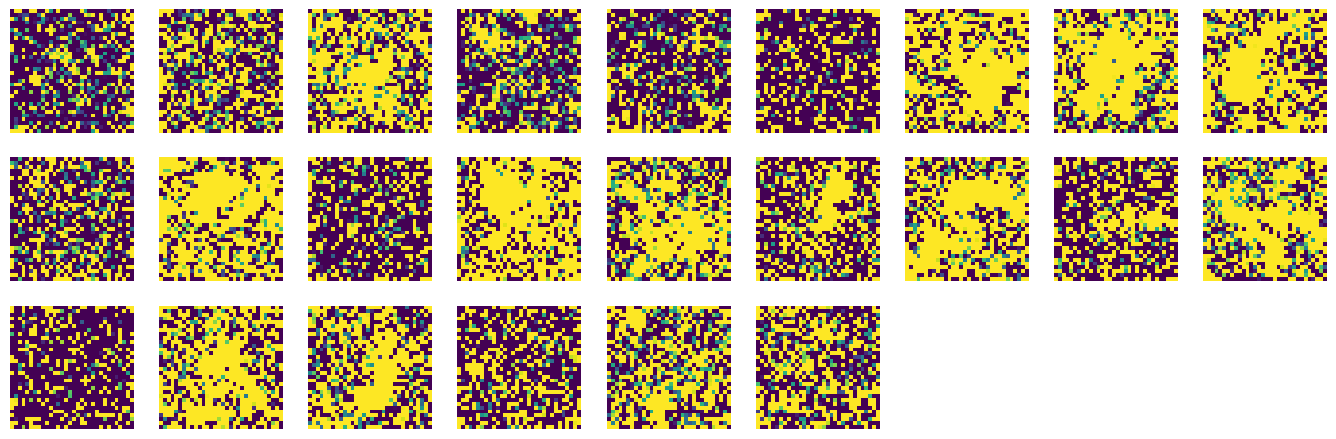

In [ ]:
# Plot results
nb_images = 81
mnist_samples = diffusion_model.sampling(n_samples=nb_images, use_tqdm=False)
plt.figure(figsize=(17, 17))
for i in range(24):
    plt.subplot(9, 9, 1 + i)
    plt.axis('off')
    plt.imshow(mnist_samples[i].squeeze(0).clip(0, 1).data.cpu().numpy())
plt.show()

In [ ]:
# Plot results
fashionMNIST_samples = diffusion_model.sampling(n_samples=nb_images, use_tqdm=False)
plt.figure(figsize=(17, 17))
for i in range(24):
    plt.subplot(9, 9, 1 + i)
    plt.axis('off')
    plt.imshow(fashionMNIST_samples[i].squeeze(0).clip(0, 1).data.cpu().numpy())
plt.show()

In [ ]:
print(device)

In [ ]:
print(f"Samples shape: {mnist_samples.shape}")
mnist_samples

In [ ]:
mnist_images = sample_batch(nb_images, device)
mnist_images.shape

torch.Size([64, 1, 32, 32])

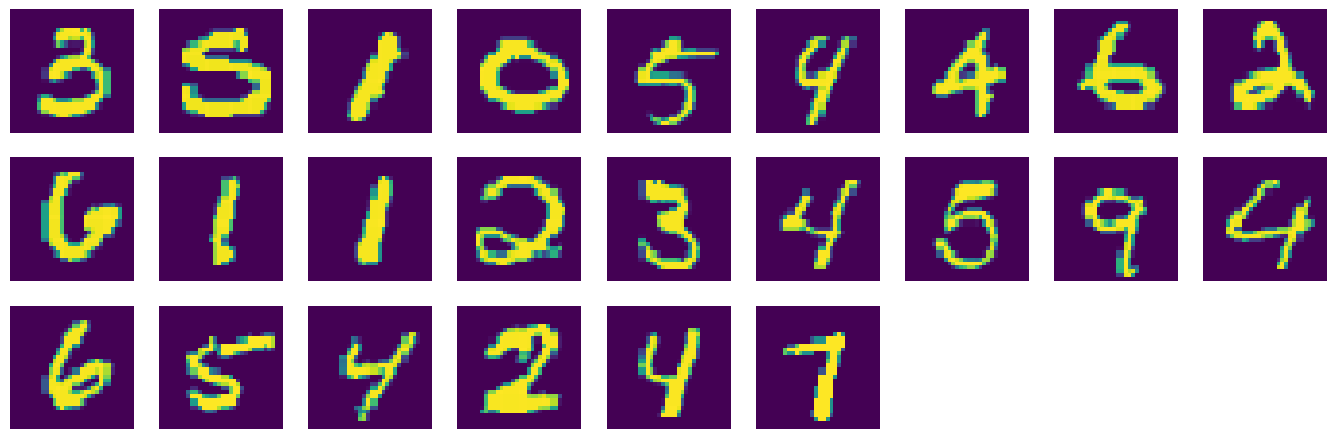

In [ ]:
plt.figure(figsize=(17, 17))
for i in range(24):
    plt.subplot(9, 9, 1 + i)
    plt.axis('off')
    plt.imshow(mnist_images[i].squeeze(0).clip(0, 1).data.cpu().numpy())
plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((299, 299)),
    transforms.ToTensor()
])

def transformV0(images, transform):
    resized_images = []
    for img in images:
        img = transforms.ToPILImage()(img)  # Convert to PIL image
        img = transform(img)                # Apply the resize transform
        resized_images.append(img)
    return torch.stack(resized_images)

trans_mnist_images = transformV0(mnist_images, transform)
trans_mnist_samples = transformV0(mnist_samples, transform)
trans_mnist_images.shape, trans_mnist_samples.shape

(torch.Size([64, 3, 299, 299]), torch.Size([81, 3, 299, 299]))

In [ ]:
def visualize_data(batch):
    batch = batch.cpu().numpy()
    plt.figure(figsize=(10, 10))
    for i in range(min(25, batch.shape[0])):  # Display up to 25 images
        plt.subplot(5, 5, i + 1)
        img_np = batch[i].transpose(1, 2, 0)
        plt.imshow(img_np)
        plt.axis('off')
    plt.show()

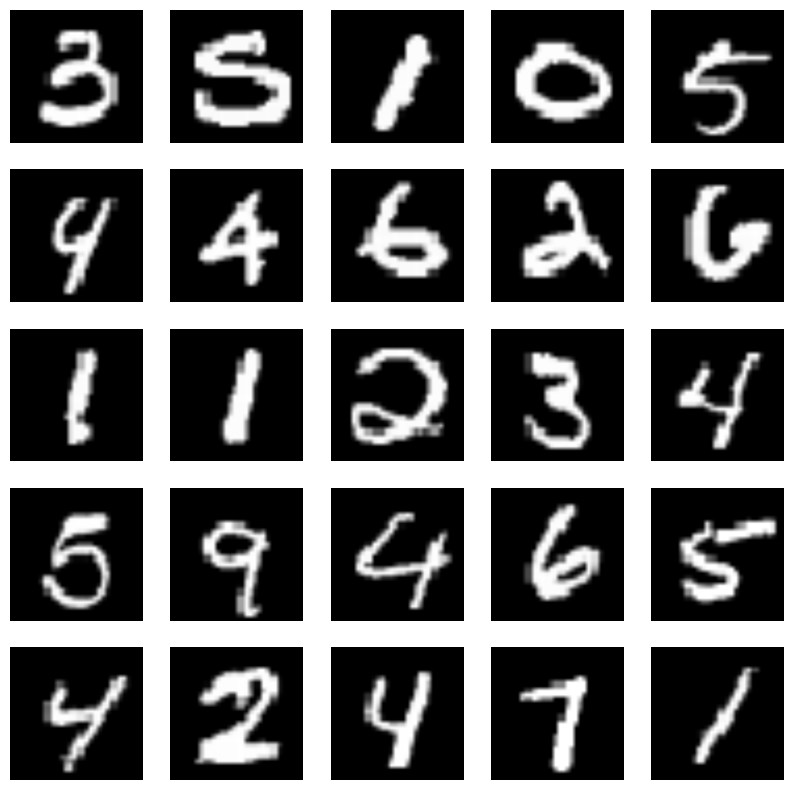

In [ ]:
visualize_data(trans_mnist_images)

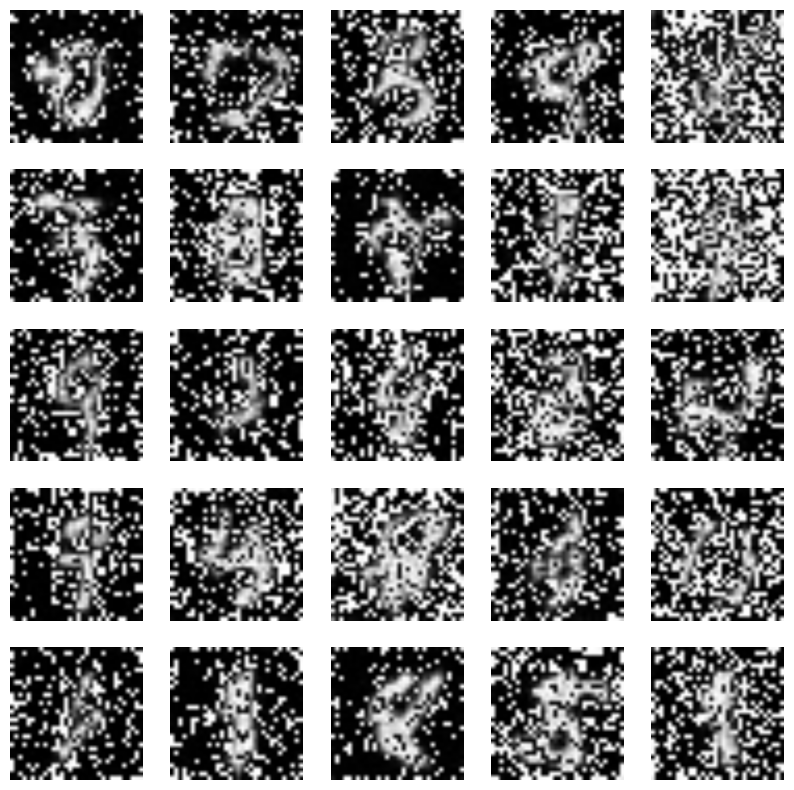

In [ ]:
visualize_data(trans_mnist_samples)

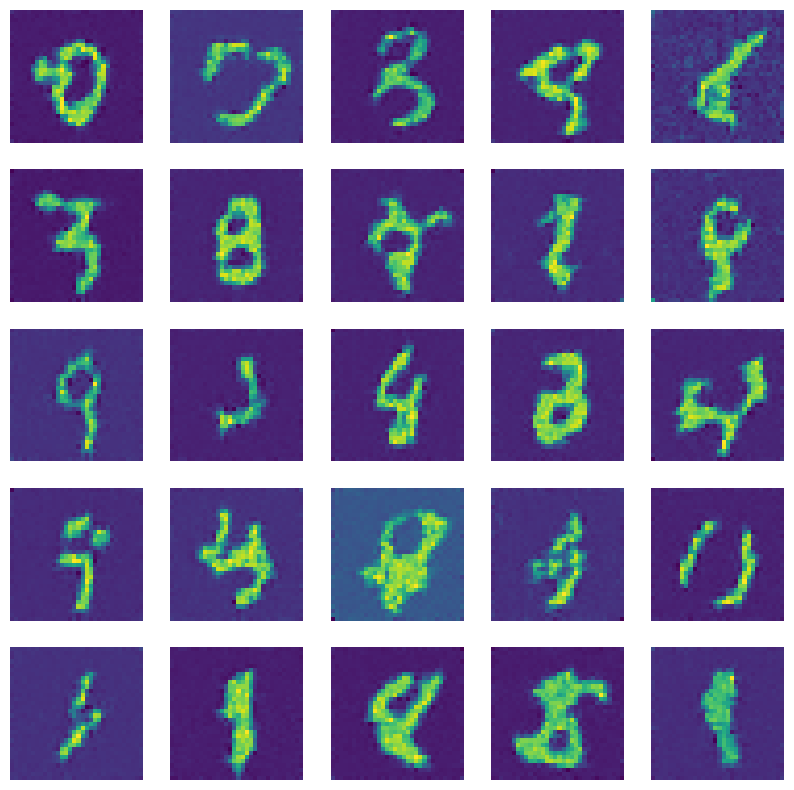

In [ ]:
visualize_data(mnist_samples)

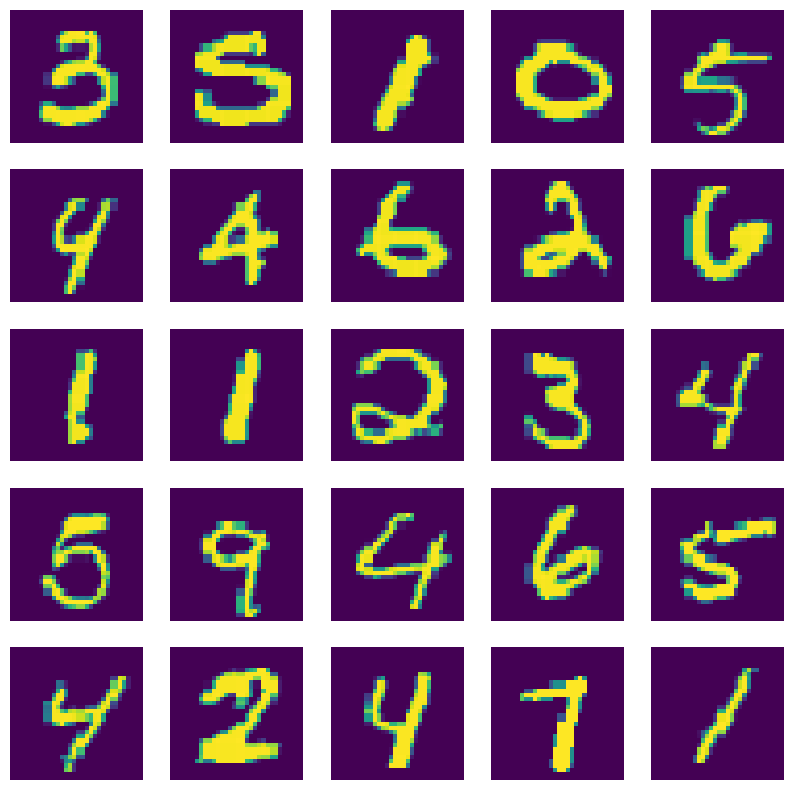

In [ ]:
visualize_data(mnist_images)

In [ ]:
mnist_samples.shape, mnist_images.shape

(torch.Size([81, 1, 32, 32]), torch.Size([64, 1, 32, 32]))

In [ ]:
# libraries and packages
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from random import randint
from scipy.linalg import sqrtm # square root
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
# []
def calculate_fid(imgA, imgB):
    actA = model.predict(imgA)
    # actA.shape = [2048, 1]
    actB = model.predict(imgB)

# Calculate fid using torch.fid

In [ ]:
fashion_mnist_real_images = sample_batch(24, device)
trans_data_2 = resize_images(fashion_mnist_real_images, transform)
trans_sample_data_2 = resize_images(samples, transform)
visualize_data(fashion_mnist_real_images)

In [ ]:
cifar_data = sample_batch_cifar10(24, device)
trans_data_3 = resize_images(cifar_data, transform)
trans_sample_data_3 = resize_images(samples, transform)
visualize_data(cifar_data)
cifar_data.shape

In [ ]:
visualize_data(samples)

In [ ]:
from torchmetrics.image.fid import FrechetInceptionDistance
# fid for mnist
fid = FrechetInceptionDistance(normalize=True)
fid.update(trans_mnist_images, real=True)
fid.update(trans_mnist_samples, real=False)
print(fid.compute())

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 299MB/s]


tensor(401.4005)


In [ ]:
fashion_mnist_fid = FrechetInceptionDistance(normalize=True)
fid.update(trans_data_2, real=True)
fid.update(trans_sample_data_2, real=False)
print(f"FashionMnist FID: {fid.compute()}")

In [ ]:
cifar10_fid = FrechetInceptionDistance(normalize=True)
fid.update(trans_data_3, real=True)
fid.update(trans_sample_data_3, real=False)
print(f"Cifar10: {fid.compute()}")

# Cài đặt FID bằng Numpy

In [ ]:
# libraries and packages
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from random import randint
from scipy.linalg import sqrtm

In [ ]:
!pip install scikit-image

In [ ]:
# calculate frechet inception distance, may have to transform from tensor to numpy array
def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

# define two collections of activations
act1 = random(10*2048)
act1 = act1.reshape((10,2048))
act2 = random(10*2048)
act2 = act2.reshape((10,2048))
# fid between act1 and act1
fid = calculate_fid(act1, act1)
print('FID (same): %.3f' % fid)
# fid between act1 and act2
fid = calculate_fid(act1, act2)
print('FID (different): %.3f' % fid)

# Cài đặt FID bằng Keras

In [ ]:
# example of calculating the frechet inception distance in Keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return numpy.asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    print(act1.shape)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images (include 10 images)
images1 = numpy.random.randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = numpy.random.randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

87910968/87910968 [==============================] - 5s 0us/step
Prepared (10, 32, 32, 3) (10, 32, 32, 3)
Scaled (10, 299, 299, 3) (10, 299, 299, 3)
1/1 [==============================] - 5s 5s/step
(10, 2048)
1/1 [==============================] - 0s 35ms/step
FID (same): -4214362737381194360485454324663350254951532586004905984.000
1/1 [==============================] - 0s 35ms/step
(10, 2048)
1/1 [==============================] - 0s 36ms/step
FID (different): 488496857216957311401011964132182101694141970172930533107116522078699477223838556240449391664031890230642475008.000


# FID với real images

In [ ]:
# example of calculating the frechet inception distance in Keras for cifar10
# --> run out of memory due to much computation
import sklearn
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
sklearn.utils.shuffle(images1)
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)